In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [62]:
from datetime import datetime, date, timedelta
today = datetime.now()
today

datetime.datetime(2020, 4, 20, 12, 15, 6, 265395)

In [63]:
today.strftime('%Y-%m-%d %H:%M:%S %A')

'2020-04-20 12:15:06 Monday'

In [64]:
date.today()

datetime.date(2020, 4, 20)

In [65]:
pd.to_datetime(date.today()) - pd.to_timedelta(np.arange(12), 'W')

DatetimeIndex(['2020-04-20', '2020-04-13', '2020-04-06', '2020-03-30',
               '2020-03-23', '2020-03-16', '2020-03-09', '2020-03-02',
               '2020-02-24', '2020-02-17', '2020-02-10', '2020-02-03'],
              dtype='datetime64[ns]', freq=None)

In [66]:
pd.to_timedelta(np.arange(12), 'W')

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days',
                '70 days', '77 days'],
               dtype='timedelta64[ns]', freq=None)

### Seaborn
https://seaborn.pydata.org/index.html

### Time Series
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [67]:
fmri = sns.load_dataset("fmri")
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


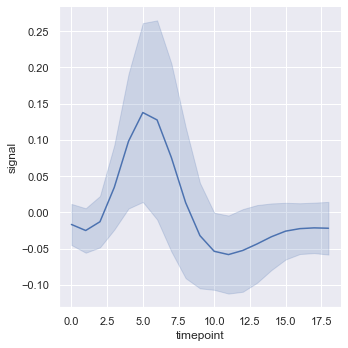

In [68]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd",data=fmri)

In [69]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
3,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152 entries, 0 to 11151
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  11152 non-null  datetime64[ns]
 1   day                      11152 non-null  int64         
 2   month                    11152 non-null  int64         
 3   year                     11152 non-null  int64         
 4   cases                    11152 non-null  int64         
 5   deaths                   11152 non-null  int64         
 6   countriesAndTerritories  11152 non-null  object        
 7   geoId                    11119 non-null  object        
 8   countryterritoryCode     11039 non-null  object        
 9   popData2018              11077 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 871.4+ KB


In [71]:
# df.pop('countryterritoryCode') 
df.drop(columns = ['countryterritoryCode','popData2018'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152 entries, 0 to 11151
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  11152 non-null  datetime64[ns]
 1   day                      11152 non-null  int64         
 2   month                    11152 non-null  int64         
 3   year                     11152 non-null  int64         
 4   cases                    11152 non-null  int64         
 5   deaths                   11152 non-null  int64         
 6   countriesAndTerritories  11152 non-null  object        
 7   geoId                    11119 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 697.1+ KB


In [72]:
df['day'] = df['day'].astype('int8')
df['month'] = df['month'].astype('int8')
df['year'] = df['year'].astype('int16')
df['cases'] = df['cases'].astype('int32')
df['deaths'] = df['deaths'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152 entries, 0 to 11151
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  11152 non-null  datetime64[ns]
 1   day                      11152 non-null  int8          
 2   month                    11152 non-null  int8          
 3   year                     11152 non-null  int16         
 4   cases                    11152 non-null  int32         
 5   deaths                   11152 non-null  int32         
 6   countriesAndTerritories  11152 non-null  object        
 7   geoId                    11119 non-null  object        
dtypes: datetime64[ns](1), int16(1), int32(2), int8(2), object(2)
memory usage: 392.2+ KB


In [73]:
# NGUYEN: Count total case in the last week
import time
start = time.time()
lw = df[['dateRep','cases']].groupby('dateRep').sum().sort_values(by='dateRep', ascending=False)
total = lw.head(6).sum() # rêcent week
end = time.time()
print('total: {} in {}'.format(total, end-start))

total: cases    466073
dtype: int64 in 0.0050411224365234375


In [74]:
#QUANG NGUYEN
start = time.time()
current_date = datetime.now()
week_ago = current_date - timedelta(days = 7)
total = df[df['dateRep'] >= week_ago]['cases'].sum() # bắt đầu filter từ week ago
#ko cần dùng nhiều phép toán groupby, sum, sort --> quick
end = time.time()
print('total: {} in {}'.format(total, end-start))

total: 222627 in 0.0021991729736328125


In [75]:
current_week = pd.to_datetime(datetime.now()).weekofyear
df['weekofyear'] = df['dateRep'].dt.weekofyear 
# pandas.Series.dt : accessor object to datetime like properties of Series
df[df.weekofyear==current_week].cases.sum()

0

In [76]:
df_us = df[df.geoId=='US']
df_us.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,weekofyear
10756,2020-04-16,16,4,2020,30148,4928,United_States_of_America,US,16
10757,2020-04-15,15,4,2020,26922,2408,United_States_of_America,US,16
10758,2020-04-14,14,4,2020,25023,1541,United_States_of_America,US,16
10759,2020-04-13,13,4,2020,27620,1500,United_States_of_America,US,16
10760,2020-04-12,12,4,2020,28391,1831,United_States_of_America,US,15


Text(0.5, 0, 'Month')

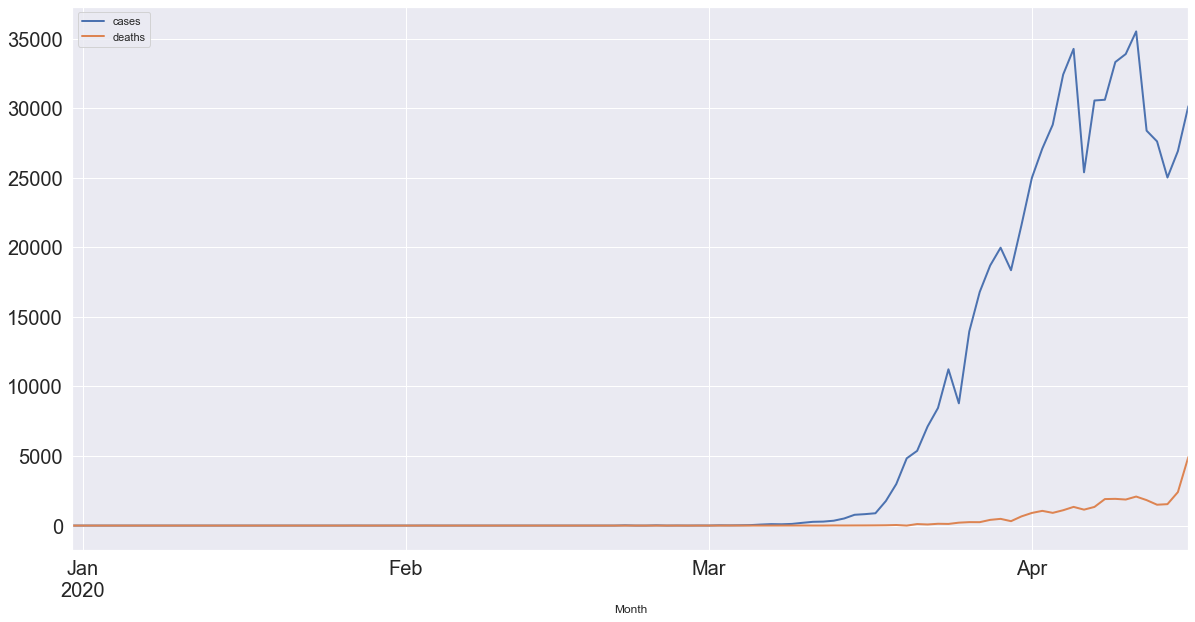

In [77]:
df_us[['dateRep','cases','deaths']].set_index('dateRep').plot(figsize=(20,10), 
                                                              linewidth=2, 
                                                              fontsize=20)
plt.xlabel('Month')

Text(0.5, 0, 'Week of Year')

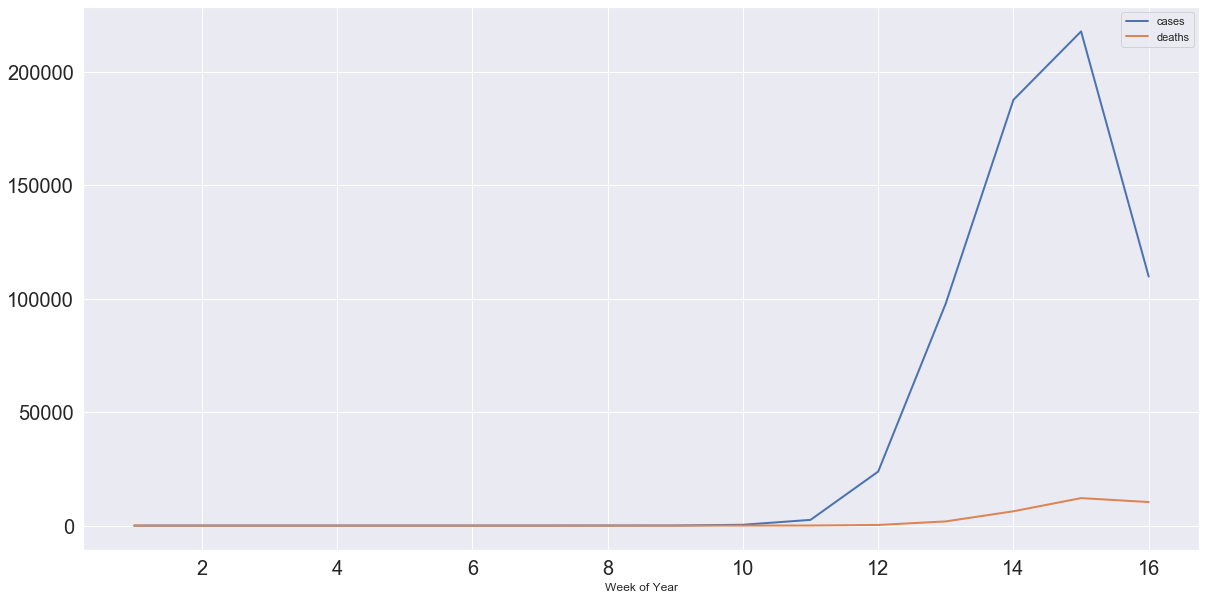

In [78]:
df_us[['weekofyear','cases','deaths']].groupby('weekofyear').sum().plot(figsize=(20,10), 
                                                                        linewidth=2, 
                                                                        fontsize=20)
plt.xlabel('Week of Year')

In [79]:
df_us['Cumsum_cases'] = df_us.loc[::-1, 'cases'].cumsum()[::-1]
df_us.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,weekofyear,Cumsum_cases
10756,2020-04-16,16,4,2020,30148,4928,United_States_of_America,US,16,639664
10757,2020-04-15,15,4,2020,26922,2408,United_States_of_America,US,16,609516
10758,2020-04-14,14,4,2020,25023,1541,United_States_of_America,US,16,582594
10759,2020-04-13,13,4,2020,27620,1500,United_States_of_America,US,16,557571
10760,2020-04-12,12,4,2020,28391,1831,United_States_of_America,US,15,529951


In [80]:
df_countries = pd.read_csv('countries_long_lat.csv', delimiter='\t')
df_countries.dropna(inplace=True)
df_countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [81]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    243 non-null    object 
 1   latitude   243 non-null    float64
 2   longitude  243 non-null    float64
 3   name       243 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [82]:
df_countries['geoId'] = df_countries.country
df_countries.pop('country')
df_countries.set_index('geoId', inplace=True)
df_countries.head()

,latitude,longitude,name
geoId,,,
AD,42.546245,1.601554,Andorra
AE,23.424076,53.847818,United Arab Emirates
AF,33.939110,67.709953,Afghanistan
AG,17.060816,-61.796428,Antigua and Barbuda
AI,18.220554,-63.068615,Anguilla


In [83]:
df_sum = df[['cases', 'geoId']].groupby('geoId').sum()
df_sum

,cases
geoId,
AD,673
AE,5365
AF,784
AG,23
AI,3
...,...
XK,423
YE,1
ZA,2506


In [90]:
df_covid = pd.merge(df_sum, df_countries, on=['geoId'])
df_covid.loc[df_covid['name']=='Vietnam']

,cases,latitude,longitude,name
geoId,,,,
VN,275,14.058324,108.277199,Vietnam


In [85]:
df_covid.shape

(198, 4)

In [86]:
df_covid.cases.max()

639664

In [92]:
df_covid['case_scale'] = (df_covid.cases/639664) * 15
df_covid['case_scale'] = df_covid['case_scale'].astype('int32')
df_covid.head()

,cases,latitude,longitude,name,case_scale
geoId,,,,,
AD,673,42.546245,1.601554,Andorra,0
AE,5365,23.424076,53.847818,United Arab Emirates,0
AF,784,33.939110,67.709953,Afghanistan,0
AG,23,17.060816,-61.796428,Antigua and Barbuda,0
AI,3,18.220554,-63.068615,Anguilla,0


In [88]:
st = int(10)
end = int(160)
no = int(16)
size_real = np.linspace(10, 160, 16)
#size_real = np.linspace(st, end, no)

size_real

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160.])

In [89]:
import folium
# size_real = np.linspace(10, 150, 15)
m = folium.Map(location=[46.227638, 2.213749], zoom_start=3)
for lat, lng, add, size, case in zip(df_covid.latitude, 
                                     df_covid.longitude, 
                                     df_covid.name, 
                                     df_covid.case_scale, 
                                     df_covid.cases):
    size = size_real[size]
    icon = folium.features.CustomIcon('icon.png',icon_size=(size, size))
    folium.Marker([lat, lng],popup=add + ': ' + str(case), icon=icon).add_to(m)
m